In [1]:
%load_ext autoreload 
%autoreload 2
import sys
import pandas as pd
pd.options.display.max_rows=100
pd.options.display.min_rows=100
pd.options.display.max_colwidth=120
sys.path.insert(0, '/SSF')
import os
os.chdir('/SSF')

import io
from typing import Tuple

import pandas as pd
import requests

s = requests.get(
    "https://docs.google.com/spreadsheets/d/1zZZfsz7kz1VvzFQhO-gI5TLe6Rc70EooURBai_z8YT8/export?format=csv&id=1zZZfsz7kz1VvzFQhO-gI5TLe6Rc70EooURBai_z8YT8&gid=1195533860",
    proxies={
        "http": "http://cpu3:7890",
        "https": "http://cpu3:7890",
    },
    allow_redirects=True,
).content
print("download finished")
eval_rets = pd.read_csv(io.StringIO(s.decode('utf-8')))
eval_rets.rename(columns=lambda x: x.rstrip(" "), inplace=True)
eval_rets

download finished


,n_instances,n_metrics,n_failures,epoch_time,gpu
0,4,2048,100,0.339952,True
1,8,2048,100,0.361809,True
2,16,2048,100,0.522010,True
3,32,2048,100,0.525389,True
4,64,2048,100,0.864436,True
5,128,2048,100,0.915783,True
6,256,2048,100,1.014136,True
7,512,2048,100,1.079374,True
8,1024,2048,100,1.587573,True
9,2048,2048,100,4.976547,True


In [2]:
eval_rets['gpu'] = eval_rets['gpu'].map(lambda x: {True: 'w/ GPU', False: 'w/o GPU'}[x])

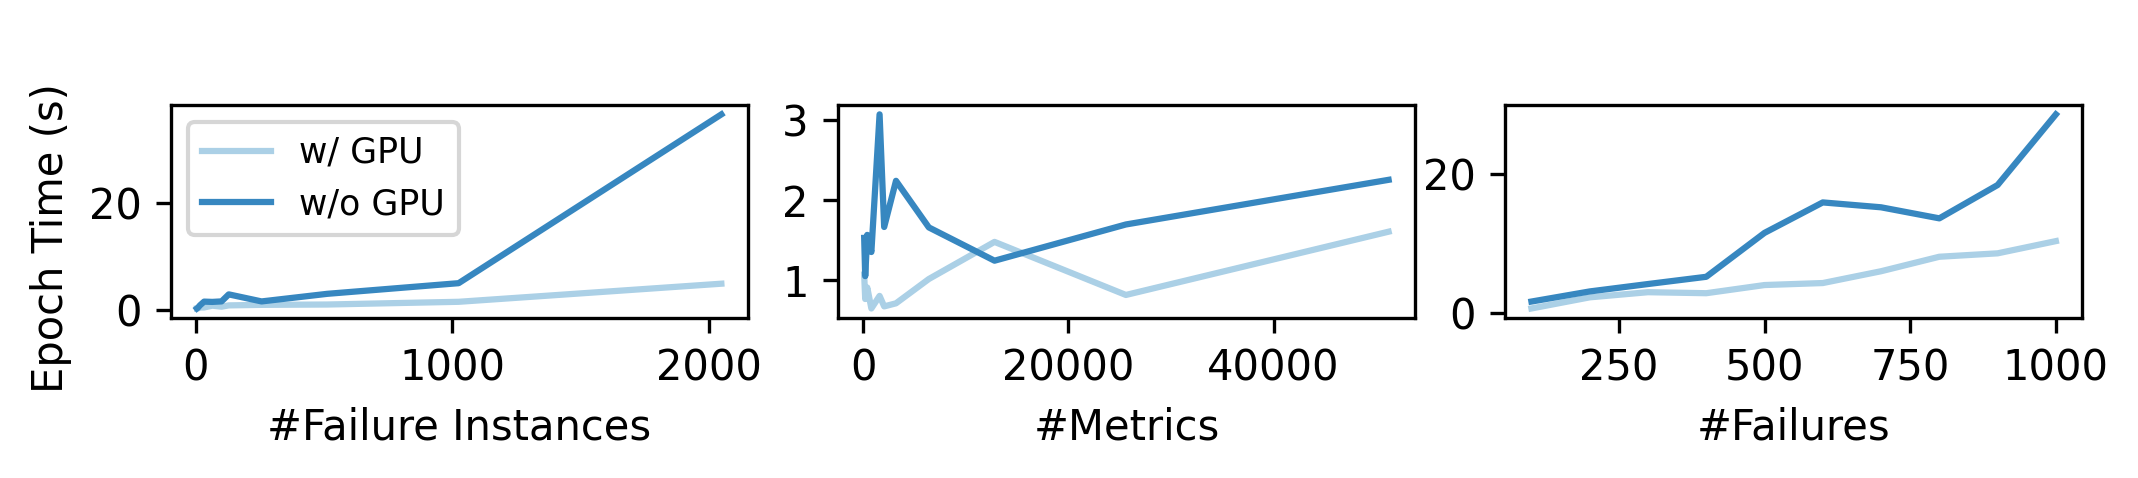

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(7, 1.2), dpi=300, sharey=False)


sns.lineplot(
    data=eval_rets.loc[
        (eval_rets['n_metrics'] == 2048) & 
        (eval_rets['n_failures'] == 100),
    ],
    x='n_instances',
    y='epoch_time',
    hue='gpu',
    ax=axes[0],
    palette="Blues",
)
axes[0].legend(title="", fontsize='small')
axes[0].set_ylabel("Epoch Time (s)    ")
axes[0].set_xlabel("#Failure Instances")

sns.lineplot(
    data=eval_rets.loc[
        (eval_rets['n_instances'] == 100) & 
        (eval_rets['n_failures'] == 100),
    ],
    x='n_metrics',
    y='epoch_time',
    hue='gpu',
    ax=axes[1],
    palette="Blues",
)
axes[1].legend_.set_title("")
axes[1].set_ylabel(None)
axes[1].set_xlabel("#Metrics")
axes[1].legend_.set_visible(False)

sns.lineplot(
    data=eval_rets.loc[
        (eval_rets['n_metrics'] == 2048) & 
        (eval_rets['n_instances'] == 100),
    ],
    x='n_failures',
    y='epoch_time',
    hue='gpu',
    ax=axes[2],
    palette="Blues",
)
axes[2].legend_.set_visible(False)
axes[2].legend_.set_title("")
axes[2].set_ylabel(None)
axes[2].set_xlabel("#Failures")

plt.tight_layout(pad=0.2)
plt.savefig(
    "/SSF/output/plot_training_time_simulated/plot_training_time_simulated.pdf", 
    bbox_inches='tight', pad_inches=0
)
plt.show()
plt.close()

In [19]:
eval_rets.loc[
        (eval_rets['n_metrics'] == 10) & 
        (eval_rets['n_instances'] == 10),
    ]

,n_instances,n_metrics,n_failures,epoch_time,gpu
10,10,10,100,0.406837,w/ GPU
20,10,10,100,0.291951,w/ GPU
21,10,10,200,0.673980,w/ GPU
22,10,10,300,0.793588,w/ GPU
23,10,10,400,0.993395,w/ GPU
24,10,10,500,1.248515,w/ GPU
25,10,10,600,1.561826,w/ GPU
26,10,10,700,1.839816,w/ GPU
27,10,10,800,2.035789,w/ GPU
28,10,10,900,2.371332,w/ GPU
